In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("./data/SP500.csv", index_col=0, error_bad_lines=False)

In [3]:
df = df.dropna()

In [4]:
df['SP500'] = df[df['SP500']!='.'].astype(float)

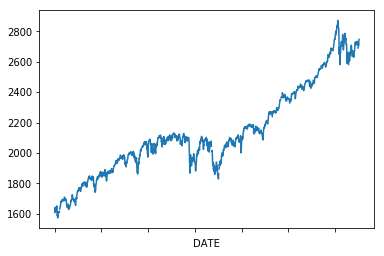

In [5]:
df['SP500'].plot()

In [6]:
df['SP500_30']=pd.rolling_mean(df['SP500'], window=30)
df['SP500_60']=pd.rolling_mean(df['SP500'], window=60)

C:\Users\HP\Anaconda3\envs\cnb\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\envs\cnb\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  


In [7]:
change_rate = np.log(df['SP500']/df['SP500'].shift(-1))
df['tomorrow'] = np.where(change_rate>0, 1, 0)
df['tomorrow'] = df['tomorrow'].astype(int)

In [8]:
df = df.dropna()
df.head()

,SP500,SP500_30,SP500_60,tomorrow
DATE,,,,
11/25/2013,1802.48,1765.458000,1725.985167,0
11/26/2013,1802.75,1768.947667,1728.701500,0
11/27/2013,1807.23,1771.804000,1731.270667,0
11/24/2014,2069.41,1991.954667,1984.241833,1
11/25/2014,2067.03,1998.265667,1985.321000,0


In [9]:
idxs = int(len(df)*0.8)

In [10]:
X_train = df.iloc[1:idxs+1,0].values.reshape(-1,1) # First one missing
y_train = df.iloc[0:idxs,1].values

In [11]:
X_test = df.iloc[idxs+1:-1,0].values.reshape(-1,1) # Exclude last measurement
y_test = df.iloc[idxs+1:-1,1].values

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier

In [16]:
models = [
    #RandomForestClassifier()
           LogisticRegression()
         , GaussianProcessClassifier()]

best_score = 0
best_model = None

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    
    if score > best_score:
        best_score = score
        best_model = model

ValueError: Unknown label type: 'continuous'

In [17]:
print("Best score found: ", best_score)

Best score found:  0


In [ ]:
y_preds = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_pred=y_preds, y_true=y_test)

In [ ]:
print(classification_report(y_pred=y_preds, y_true=y_test))

In [ ]:
pct = np.sum(y_preds!=y_test)/len(y_test)*100
print("Percentage of correctly guessed outcomes: ", pct)